In [1]:
import numpy as np
import pandas as pd

import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Acquire

In [2]:
df = acquire.get_telco_data()

# Prepare

In [3]:
df = prepare.clean_telco_data(df)

# Explore

`scratch_4_explore.ipynb`

# Model

In [4]:
train, validate, test = prepare.split_telco_data(df)

In [5]:
X_train, y_train = prepare.model_telco_data(train)
X_validate, y_validate = prepare.model_telco_data(validate)
X_test, y_test = prepare.model_telco_data(test)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 6830 to 2320
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3943 non-null   int64  
 1   tenure                                 3943 non-null   int64  
 2   monthly_charges                        3943 non-null   float64
 3   total_charges                          3943 non-null   float64
 4   gender_encoded                         3943 non-null   int64  
 5   partner_encoded                        3943 non-null   int64  
 6   dependents_encoded                     3943 non-null   int64  
 7   phone_service_encoded                  3943 non-null   int64  
 8   paperless_billing_encoded              3943 non-null   int64  
 9   multiple_lines_No phone service        3943 non-null   uint8  
 10  multiple_lines_Yes                     3943 non-null   uint8  
 11  o

## 1. Decision Tree

## Train

#### Create

In [7]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

#### Fit

In [8]:
clf = clf.fit(X_train, y_train)

#### Visualize

TypeError: can only concatenate str (not "numpy.int64") to str

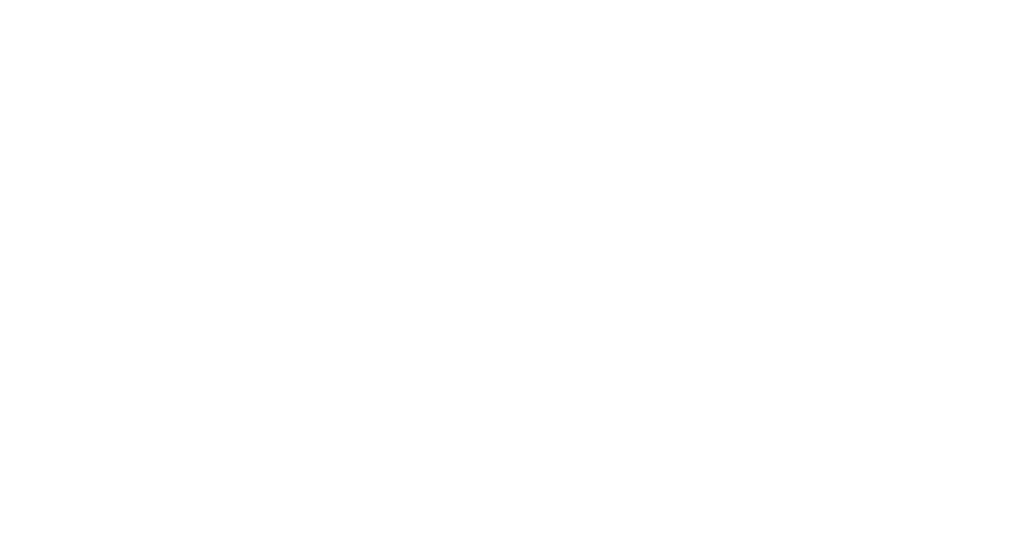

In [9]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

#### Evaluate

# Model 1 - Accuracy

In [10]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [21]:
y_pred = clf.predict(X_train)

In [22]:
confusion_matrix(y_train, y_pred)

array([[2725,  172],
       [ 627,  419]])

## Validate

#### Create

#### Fit

#### Evaluate

## 2. Random Forest

## Train

#### Create

In [24]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

#### Fit

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

#### Visualize

In [31]:
RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

#### Evaluate

In [26]:
print(rf.feature_importances_)

[2.14841302e-03 2.11702802e-01 5.45531527e-02 1.25468952e-01
 1.03507011e-04 1.76043137e-03 4.09745728e-03 4.21400069e-04
 7.08728598e-03 1.07355869e-03 3.94485441e-04 4.62419662e-02
 2.64829077e-02 1.57661025e-02 1.37730829e-02 1.53666867e-02
 7.27672143e-03 5.21047179e-02 1.69097110e-02 3.05433748e-02
 9.62149837e-04 1.02981426e-02 1.04392069e-03 3.25872599e-02
 8.84021161e-02 1.08765259e-01 1.39958264e-02 5.61044327e-03
 1.03917837e-01 1.14032819e-03]


In [27]:
y_pred = rf.predict(X_train)

# Model 2 - Accuracy

In [28]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [29]:
print(confusion_matrix(y_train, y_pred))

[[2765  132]
 [ 694  352]]


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2897
           1       0.73      0.34      0.46      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.65      0.67      3943
weighted avg       0.78      0.79      0.76      3943



## Validate

#### Create

#### Fit

#### Evaluate

## 3. KNN

## Train

#### Create

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Evaluate

# Model 3 - Accuracy

In [37]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [36]:
y_pred = knn.predict(X_train)

In [38]:
print(confusion_matrix(y_train, y_pred))

[[2705  192]
 [ 459  587]]


In [39]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.75      0.56      0.64      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.75      0.77      3943
weighted avg       0.83      0.83      0.83      3943



## Validate

#### Create

#### Fit

#### Evaluate

## 4. Logistic Regression

## Train

#### Create

In [41]:
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

#### Fit

In [42]:
logit.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

#### Evaluate

In [43]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 3.55752514e-01 -4.32218147e-02  5.27583965e-02 -1.27925431e-06
   2.96762140e-01  2.24458194e-02 -2.73771928e-01 -2.06767072e-01
   6.68794085e-01  1.09580642e+00 -2.61592067e-01  9.10649996e-02
  -2.50322355e-01  9.10649996e-02 -1.03758073e-01  9.10649996e-02
  -2.67421109e-01  9.10649996e-02 -3.41978349e-01  9.10649996e-02
  -9.28527122e-02  9.10649996e-02 -9.37889725e-02 -3.15044886e-01
  -4.79544588e-01 -2.85646296e-01  9.10649996e-02 -5.37823790e-02
   8.98594719e-01  2.45541748e-02]]
Intercept: 
 [0.88935966]


In [44]:
y_pred = logit.predict(X_train)

# Model 4 - Accuracy

In [45]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.33


In [46]:
print(confusion_matrix(y_train, y_pred))

[[ 261 2636]
 [   2 1044]]


In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.09      0.17      2897
           1       0.28      1.00      0.44      1046

    accuracy                           0.33      3943
   macro avg       0.64      0.54      0.30      3943
weighted avg       0.80      0.33      0.24      3943



## Validate

#### Create

#### Fit

#### Evaluate

# Finish

In [ ]:
Stats Test  *

In [ ]:
Final Choice
On Test  *

In [ ]:
csv

In [ ]:
Final Notebook *

Only 

In [ ]:
README *

In [ ]:
Presentation

In [ ]:
Improve MVP